<a href="https://colab.research.google.com/github/yashgandhijee2018/ML-Project/blob/main/CNN%20Model%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  
drive.mount("/content/drive/")

Mounted at /content/drive/


Importing Libraries and Importing Dataset


In [27]:
#importing necessary libraries
import os
import keras
import matplotlib
import cv2
import numpy as np
import skimage.io as io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

Reading the data from the disk

In [3]:
# reading data from the disk storage
data= pd.read_csv(r'/content/drive/My Drive/devanagari-character-set.csv')
data.shape
size=data.shape[0]
n_classes=46
# shape of the data is 92000 images
# and each image is 32x32 with 28 pixels of the region representing the actual text
# and 4 pixels as padding

Data Normalization

In [4]:
X = data.values[:,:-1]/255.0
Y = data["character"].values
n_classes = 46

Data Splitting and Pre-processing for Y values

In [5]:
# Splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=6)

# Encode the categories
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

Y_test=Y_test.astype(int)
Y_train=Y_train.astype(int)
X_test=X_test.astype(int)
X_train=X_train.astype(int)

Creating a reference dictionary

In [6]:
# a reference array for final classification of data
# reference = {1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}

reference = {1: 'क', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'झ', 10: 'ञ', 11: 'ट', 12: 'ठ', 13: 'ड', 14: 'ढ', 15: 'ण', 16: 'त', 17: 'थ', 18: 'द', 19: 'ध', 20: 'न', 21: 'प', 22: 'फ', 23: 'ब', 24: 'भ', 25: 'म', 26: 'य', 27: 'र', 28: 'ल', 29: 'व', 30: 'स', 31: 'ष', 32: 'श', 33: 'ह', 34: 'श्र', 35: 'त्र', 36: 'ज्ञ', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
labels=['क', 'ख', 'ग', 'घ',  'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'स', 'ष', 'श', 'ह', 'श्र', 'त्र', 'ज्ञ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(reference)
print(type(reference))

{1: 'क', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'झ', 10: 'ञ', 11: 'ट', 12: 'ठ', 13: 'ड', 14: 'ढ', 15: 'ण', 16: 'त', 17: 'थ', 18: 'द', 19: 'ध', 20: 'न', 21: 'प', 22: 'फ', 23: 'ब', 24: 'भ', 25: 'म', 26: 'य', 27: 'र', 28: 'ल', 29: 'व', 30: 'स', 31: 'ष', 32: 'श', 33: 'ह', 34: 'श्र', 35: 'त्र', 36: 'ज्ञ', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
<class 'dict'>


In [7]:
img_height_rows = 32
img_width_cols = 32

In [8]:
im_shape = (img_height_rows, img_width_cols, 1)

# reshaping the data in order to convert the given 1D array of an image to actual grid representaion
X_train = X_train.reshape((size*7)//10,32,32,1)
print(X_train.shape)
#Y_train = Y_train.reshape((size*7)//10,1)
print(Y_train.shape)
X_test = X_test.reshape(size*3//10,32,32,1)
print(X_test.shape)
#Y_test = Y_test.reshape(size*3//10,1)
print(Y_test.shape)

(64400, 32, 32, 1)
(64400, 46)
(27600, 32, 32, 1)
(27600, 46)


CNN Model

In [9]:
model = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
model.add(ip_conv_0)

# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
model.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
model.add(pool_0)

ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
model.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
model.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
model.add(pool_1)

In [10]:
# Deactivating 20% of neurons randomly for training purposes
drop_layer_0 = Dropout(0.2)
model.add(drop_layer_0)

In [11]:
# Adding Flatten Layer to the model
flat_layer_0 = Flatten()
model.add(Flatten())

In [12]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
model.add(h_dense_0)

h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
model.add(h_dense_1)

In [13]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
model.add(output_layer)

In [14]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0

In [16]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
2013/2013 [==============================] - 11s 6ms/step - loss: 0.9534 - accuracy: 0.7270 - val_loss: 0.4768 - val_accuracy: 0.8593
Epoch 2/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.4261 - accuracy: 0.8730 - val_loss: 0.3894 - val_accuracy: 0.8876
Epoch 3/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.3251 - accuracy: 0.9020 - val_loss: 0.3233 - val_accuracy: 0.9053
Epoch 4/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.2679 - accuracy: 0.9186 - val_loss: 0.3038 - val_accuracy: 0.9123
Epoch 5/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.2275 - accuracy: 0.9306 - val_loss: 0.2919 - val_accuracy: 0.9173
Epoch 6/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.1926 - accuracy: 0.9405 - val_loss: 0.2984 - val_accuracy: 0.9147
Epoch 7/10
2013/2013 [==============================] - 11s 5ms/step - loss: 0.1764 - accuracy: 0.9455 - val_loss: 0.2784 - val_ac

In [17]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.72%


Accuracy and Loss for Training and Validation

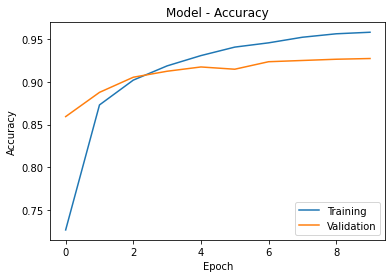

In [18]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

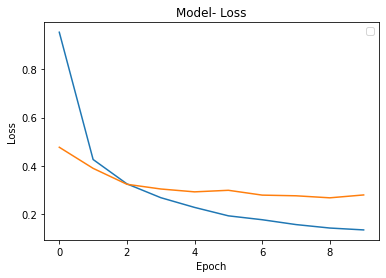

In [19]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Model Testing and Accuracy check


*   model.evaluate()
*   Precision, Recall, F1-score, Support
*   Plot ROC and compare AUC
*   Confusion Matrix

In [20]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

69/69 [==============================] - 1s 9ms/step - loss: 0.2792 - accuracy: 0.9272


[0.27916616201400757, 0.927173912525177]

In [21]:
Y_pred = model.predict(x = X_test, verbose = 1)
Y_score=model.predict(X_test)
print(Y_score)

863/863 [==============================] - 1s 2ms/step
[[3.3919455e-14 1.0886457e-22 5.7802753e-31 ... 6.6188863e-22
  0.0000000e+00 1.6672432e-26]
 [1.8763074e-16 7.2983668e-09 1.4790570e-11 ... 1.3863605e-16
  1.6867747e-09 2.0233893e-12]
 [6.8364079e-18 1.1931266e-17 6.4407227e-14 ... 9.2648198e-12
  9.9999988e-01 9.5245315e-17]
 ...
 [9.0054257e-08 7.0780742e-11 2.6161784e-08 ... 2.6369346e-11
  7.0021895e-16 1.8796078e-14]
 [2.6727064e-06 5.9388203e-08 6.4002819e-07 ... 2.1850924e-14
  6.7645362e-10 3.8935272e-11]
 [3.8210412e-14 1.8201833e-12 1.4057383e-26 ... 2.3831674e-23
  1.1268866e-19 2.6630036e-13]]


In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [23]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


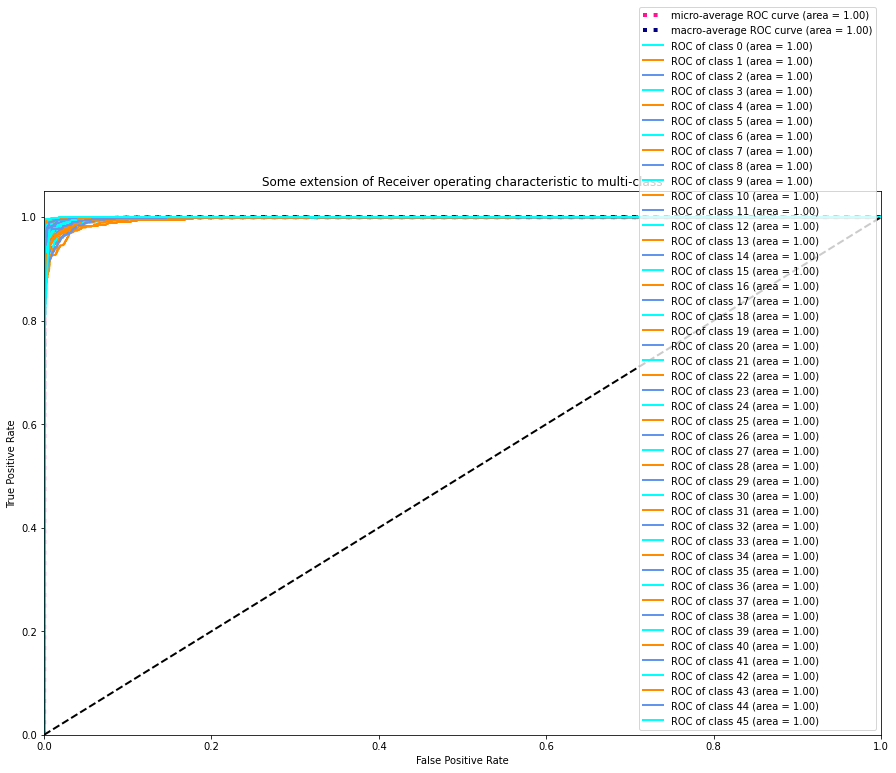

In [24]:
# Plot all ROC curves
lw=2
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
figure = plt.gcf()  # get current figure
figure.set_size_inches(15,10)
plt.show()

In [25]:
Y_pred = np.argmax(Y_pred, axis = 1)
print(Y_pred.shape)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_test.shape)

(27600,)
(27600,)


In [28]:
print("Classification report for the model %s:\n%s\n" % (model, metrics.classification_report(Y_test, Y_pred)))

Classification report for the model <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff37e8a0860>:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       590
           1       0.97      0.94      0.96       605
           2       0.97      0.94      0.95       572
           3       0.93      0.90      0.92       601
           4       0.97      0.89      0.93       597
           5       0.85      0.99      0.91       560
           6       0.94      0.93      0.94       597
           7       0.97      0.95      0.96       631
           8       0.98      0.96      0.97       618
           9       0.94      0.96      0.95       609
          10       0.93      0.95      0.94       600
          11       0.96      0.91      0.94       601
          12       0.88      0.92      0.90       598
          13       0.92      0.93      0.92       589
          14       0.94      0.90      0.92       558
          15      

In [29]:
#For plotting confusion matrix
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, labels=target_names, rotation=45)
        plt.yticks(tick_marks, labels=target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True values')
    plt.xlabel('Predicted values\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    figure = plt.gcf()  # get current figure
    figure.set_size_inches(25,25)
    plt.show()

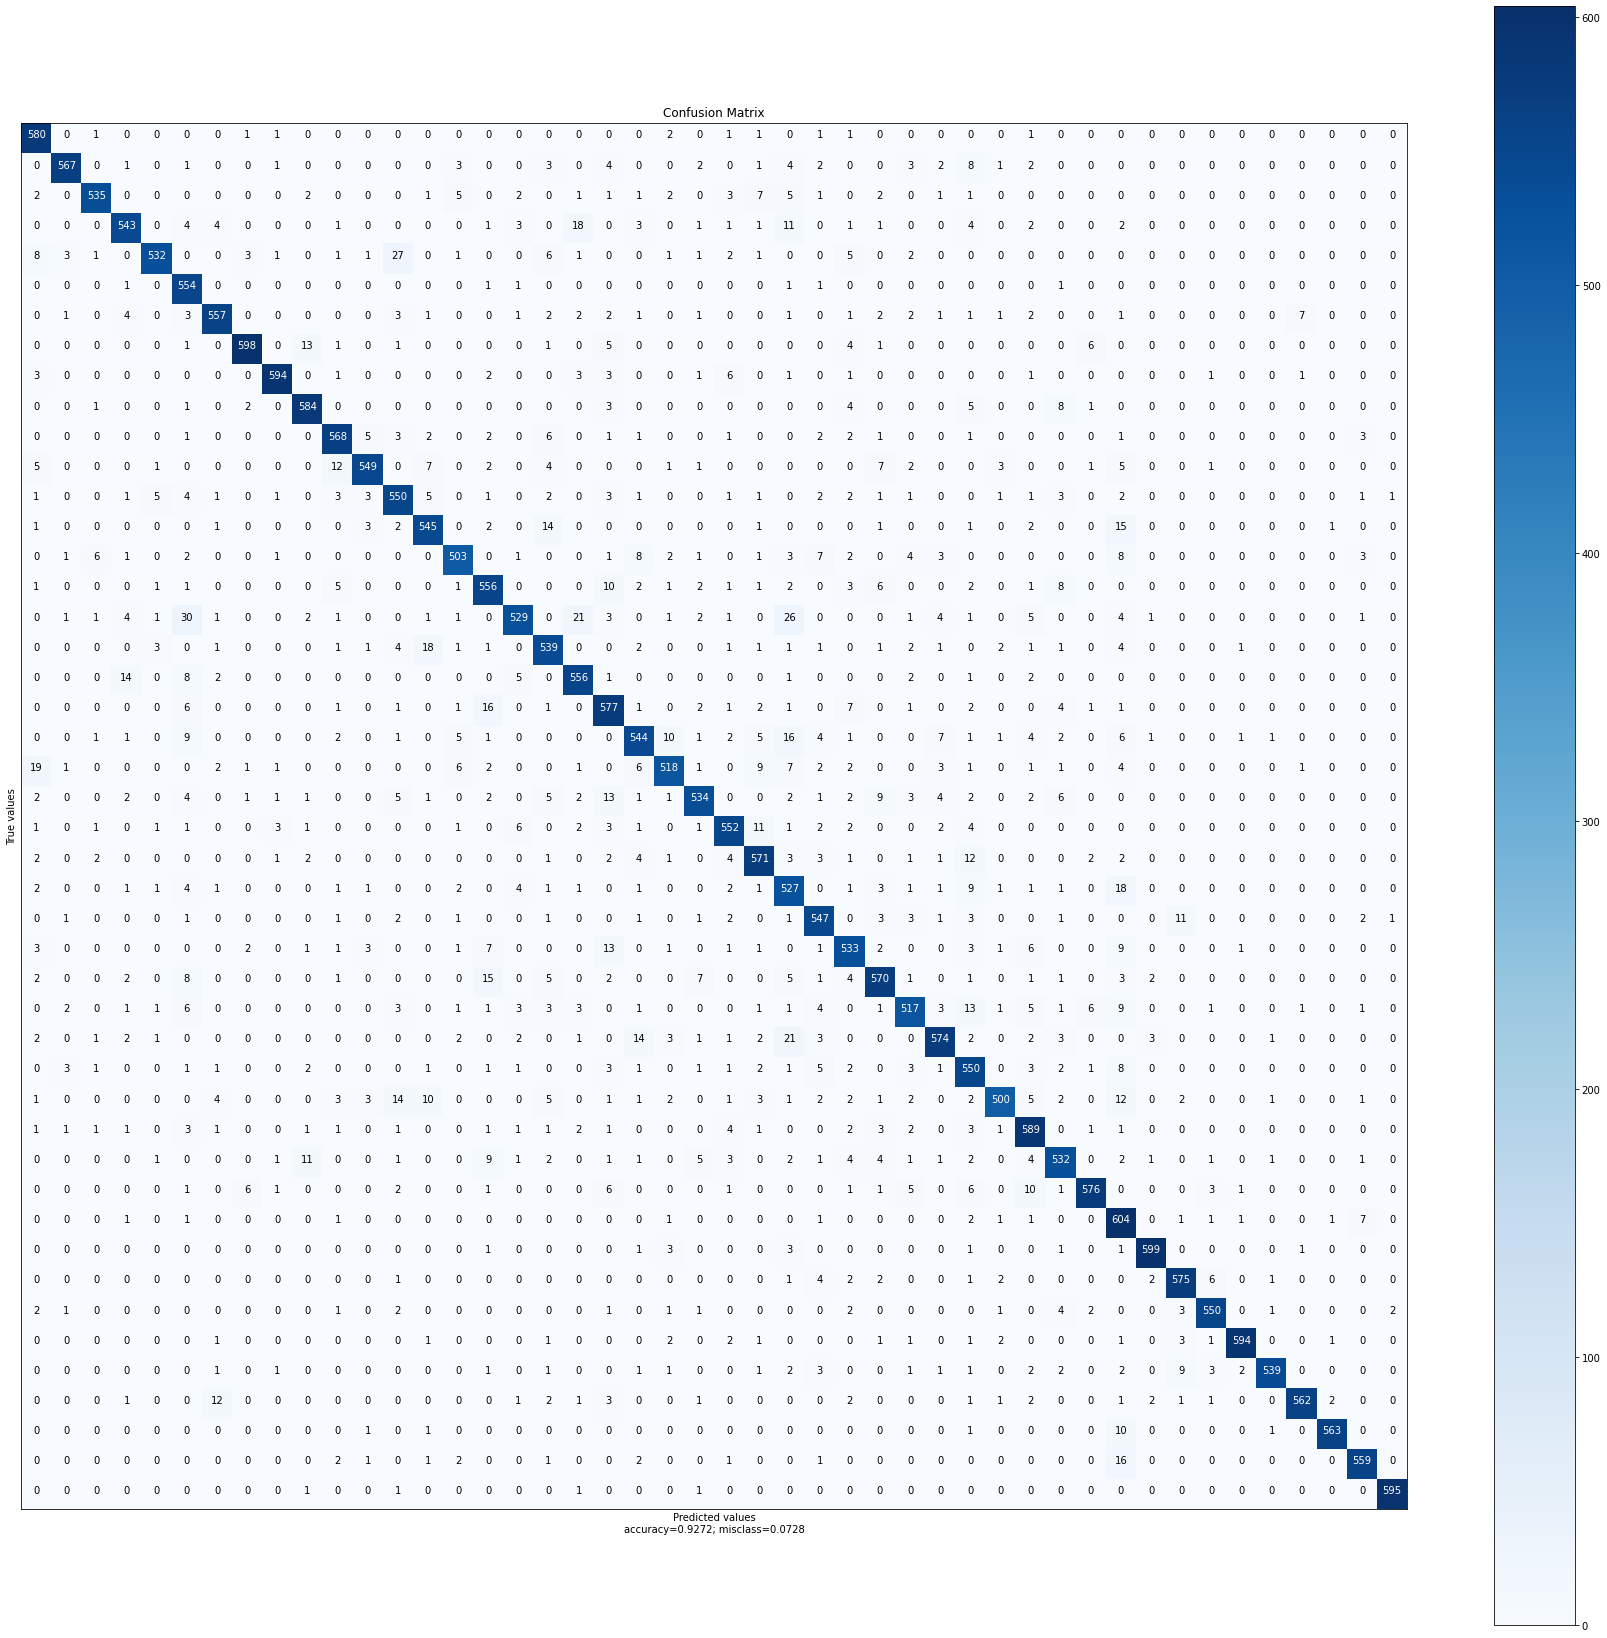

In [30]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm=cm, normalize=False, target_names='', title="Confusion Matrix")